# План
1. HOGs на котике
2. Дескрипторы

In [ ]:
# cv2.Sobel(cat, cv2.CV_32F, 1, 0, ksize=1)

In [14]:
import cv2
import numpy as np

In [21]:
image = cv2.imread("maxresdefault.jpg")

In [22]:
from matplotlib import pyplot as plt

In [23]:
image = (image[:, :, ::-1] / 255.).astype(np.float32)

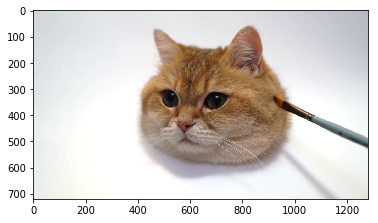

In [24]:
plt.imshow(image)

In [25]:
gx = cv2.Sobel(image, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(image, cv2.CV_32F, 0, 1, ksize=1)

In [26]:
magnitude = np.sqrt(gx ** 2 + gy ** 2)

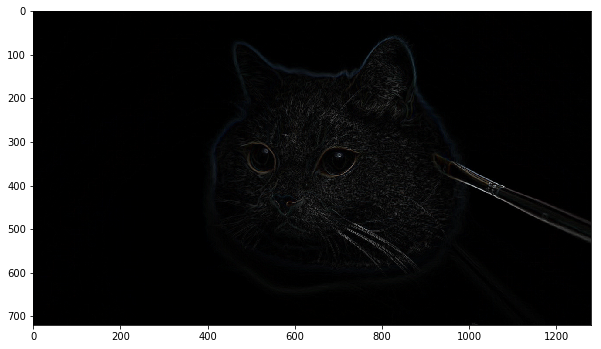

In [39]:
plt.figure(figsize=(10, 7))
plt.imshow(magnitude)

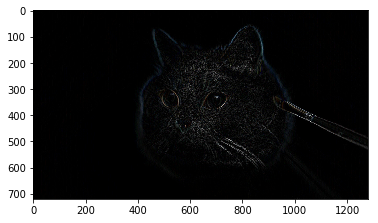

In [47]:
plt.imshow(np.abs(gx) * 2)

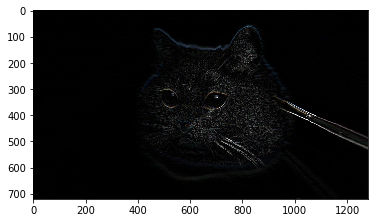

In [48]:
plt.imshow(np.abs(gy) * 2)

In [49]:
angle = np.arctan2(gy, gx)

In [52]:
angle, magnitude;

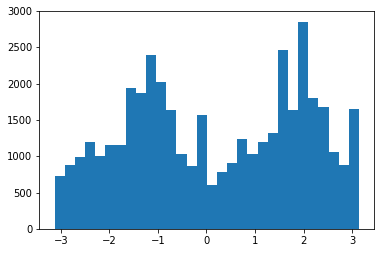

In [59]:
plt.hist(angle.reshape(-1), weights=magnitude.reshape(-1), bins=30);

In [61]:
angle = angle.reshape(-1)

In [63]:
angle[angle < 0] += np.pi

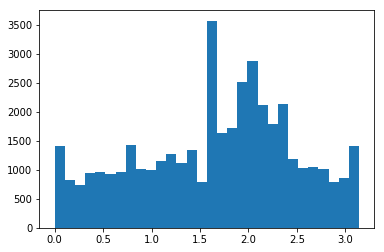

In [64]:
plt.hist(angle, weights=magnitude.reshape(-1), bins=30);

# HOG classifier

In [65]:
from sklearn.datasets import load_digits

In [66]:
digits = load_digits()

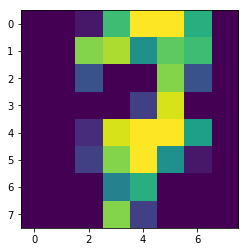

In [71]:
plt.imshow(digits['images'][300])

In [137]:
BINS = 30

In [138]:
def compute_hog(digit, bins=20):
    gx = cv2.Sobel(digit, cv2.CV_32F, 1, 0, ksize=1)
    gy = cv2.Sobel(digit, cv2.CV_32F, 0, 1, ksize=1)
    
    magnitude = np.sqrt(gx ** 2 + gy ** 2)
    angle = np.arctan2(gy, gx)
    angle[angle < 0] += np.pi
    
    hog, _ = np.histogram(angle, bins=bins, weights=magnitude, normed=True)
    return hog

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X_train, X_test, y_train, y_test = train_test_split(
    digits['images'], digits['target'], test_size=0.2)

In [141]:
centroids = np.zeros((10, BINS))
images_in_class = [0] * 10

In [142]:
for image, label in zip(X_train, y_train):
    centroids[label] += compute_hog((image / 16.).astype(np.float32), bins=BINS)
    images_in_class[label] += 1

In [143]:
centroids = centroids / np.array(images_in_class)[:, None]

In [144]:
predictions = []

In [145]:
for image in X_test:
    hog = compute_hog((image / 16.).astype(np.float32), BINS)
    distance_to_centroid = np.linalg.norm(centroids - hog, axis=1)
    predictions.append(np.argmin(distance_to_centroid))

In [146]:
from sklearn.metrics import accuracy_score

In [147]:
accuracy_score(predictions, y_test)

0.5027777777777778